# Scraping Data from Real Website + Pandas 

In [4]:
from bs4 import BeautifulSoup
import requests

In [5]:
url = "https://en.wikipedia.org/wiki/List_of_largest_companies_in_India"
page = requests.get(url)
soup = BeautifulSoup(page.text,"html")


In [6]:
print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in India - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-featur

In [7]:
soup.find_all("table")[1]

<table class="wikitable sortable">
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue<br/><small>(in  <b>₹ Crore</b>)</small>
</th>
<th>Revenue growth
</th>
<th>Profits<br/><small>(in  <b>₹ Crore</b>)</small>
</th>
<th>Headquarters
</th>
<th><a href="/wiki/List_of_public_sector_undertakings_in_India" title="List of public sector undertakings in India">State Controlled</a>
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Indian_Oil_Corporation" title="Indian Oil Corporation">Indian Oil Corporation</a>
</td>
<td><a href="/wiki/Petroleum_industry" title="Petroleum industry">Oil and gas</a>
</td>
<td style="text-align:center;">424,321
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/comm

In [8]:
soup.find("table",class_="wikitable sortable")

<table class="wikitable sortable" style="text-align:right;">
<tbody><tr>
<th align="center" colspan="2">Rank
</th>
<th align="center" colspan="2">Forbes <br/>2000 rank
</th>
<th align="center">Name
</th>
<th align="center">Headquarters
</th>
<th align="center">Revenue<br/>(billions <br/>US$)
</th>
<th align="center">Profit<br/>(billions <br/>US$)
</th>
<th align="center">Assets<br/>(billions <br/>US$)
</th>
<th align="center">Value<br/>(billions <br/>US$)
</th>
<th align="center">Industry
</th></tr>
<tr>
<td><span typeof="mw:File"><span title="Steady"><img alt="Steady" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/96/Steady2.svg/11px-Steady2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/96/Steady2.svg/17px-Steady2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/96/Steady2.svg/22px-Steady2.svg.png 2x" width="11"/></span></span>1
</td>
<td>(0)
</td>

In [9]:
table = soup.find_all("table")[1]

In [10]:
print(table)

<table class="wikitable sortable">
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue<br/><small>(in  <b>₹ Crore</b>)</small>
</th>
<th>Revenue growth
</th>
<th>Profits<br/><small>(in  <b>₹ Crore</b>)</small>
</th>
<th>Headquarters
</th>
<th><a href="/wiki/List_of_public_sector_undertakings_in_India" title="List of public sector undertakings in India">State Controlled</a>
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Indian_Oil_Corporation" title="Indian Oil Corporation">Indian Oil Corporation</a>
</td>
<td><a href="/wiki/Petroleum_industry" title="Petroleum industry">Oil and gas</a>
</td>
<td style="text-align:center;">424,321
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/comm

In [11]:
titles = table.find_all("th")

In [12]:
titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue<br/><small>(in  <b>₹ Crore</b>)</small>
 </th>,
 <th>Revenue growth
 </th>,
 <th>Profits<br/><small>(in  <b>₹ Crore</b>)</small>
 </th>,
 <th>Headquarters
 </th>,
 <th><a href="/wiki/List_of_public_sector_undertakings_in_India" title="List of public sector undertakings in India">State Controlled</a>
 </th>]

In [13]:
titles_table = [title.text.strip() for title in titles]
print(titles_table)

['Rank', 'Name', 'Industry', 'Revenue(in  ₹ Crore)', 'Revenue growth', 'Profits(in  ₹ Crore)', 'Headquarters', 'State Controlled']


In [14]:
import pandas as pd 

In [15]:
df  =  pd.DataFrame(columns = titles_table)
df

,Rank,Name,Industry,Revenue(in ₹ Crore),Revenue growth,Profits(in ₹ Crore),Headquarters,State Controlled


In [16]:
column_data = table.find_all("tr")

In [17]:
for row in column_data[1:]:
    row_data = row.find_all("td")
    individual_row_data= [data.text.strip() for data in row_data]
    length = len(df)
    df.loc[length] = individual_row_data
    

In [18]:
df 

,Rank,Name,Industry,Revenue(in ₹ Crore),Revenue growth,Profits(in ₹ Crore),Headquarters,State Controlled
0,1,Indian Oil Corporation,Oil and gas,"424,321",13.2%,"22,189",New Delhi,Yes
1,2,Reliance Industries Limited,Oil and gas,"410,295",28.2%,"36,075",Mumbai,
2,3,Oil and Natural Gas Corporation,Oil and gas,"333,143",11.0%,"22,106",New Delhi,Yes
3,4,State Bank of India,Banking,"306,528",2.6%,"−4,556",Mumbai,Yes
4,5,Tata Motors,Automotive,"301,175",7.9%,"8,989",Mumbai,
5,6,Bharat Petroleum,Oil and gas,"238,638",13.7%,"9,009",Mumbai,Yes
6,7,Hindustan Petroleum,Oil and gas,"221,693",13.4%,"7,218",Mumbai,Yes
7,8,Rajesh Exports,Gems and jewellery,"187,748",22.5%,"1,266",Bangalore,
8,9,Tata Steel,Iron and steel,"147,192",25.3%,"13,434",Mumbai,
9,10,Coal India,Metals and mining,"132,897",5.3%,"7,020",Kolkata,Yes


In [19]:
df.to_csv(r"C:\Users\AKASH\Desktop\web\name.csv",index = False)


In [20]:
data = pd.read_excel(r"C:\Users\AKASH\Desktop\project_web.xlsx")
data

,Rank,Name,Industry,Revenue_in_crore,Revenue growth,Profits_in_Crore,Headquarters,State Controlled
0,1,Indian Oil Corporation,Oil and gas,424321,0.132,22189,New Delhi,Yes
1,2,Reliance Industries Limited,Oil and gas,410295,0.282,36075,Mumbai,NaN
2,3,Oil and Natural Gas Corporation,Oil and gas,333143,0.110,22106,New Delhi,Yes
3,4,State Bank of India,Banking,306528,0.026,"âˆ’4,556",Mumbai,Yes
4,5,Tata Motors,Automotive,301175,0.079,8989,Mumbai,NaN
5,6,Bharat Petroleum,Oil and gas,238638,0.137,9009,Mumbai,Yes
6,7,Hindustan Petroleum,Oil and gas,221693,0.134,7218,Mumbai,Yes
7,8,Rajesh Exports,Gems and jewellery,187748,0.225,1266,Bangalore,NaN
8,9,Tata Steel,Iron and steel,147192,0.253,13434,Mumbai,NaN
9,10,Coal India,Metals and mining,132897,0.053,7020,Kolkata,Yes


In [21]:
data.head()

,Rank,Name,Industry,Revenue_in_crore,Revenue growth,Profits_in_Crore,Headquarters,State Controlled
0,1,Indian Oil Corporation,Oil and gas,424321,0.132,22189,New Delhi,Yes
1,2,Reliance Industries Limited,Oil and gas,410295,0.282,36075,Mumbai,NaN
2,3,Oil and Natural Gas Corporation,Oil and gas,333143,0.110,22106,New Delhi,Yes
3,4,State Bank of India,Banking,306528,0.026,"âˆ’4,556",Mumbai,Yes
4,5,Tata Motors,Automotive,301175,0.079,8989,Mumbai,NaN


In [22]:
data.tail()

,Rank,Name,Industry,Revenue_in_crore,Revenue growth,Profits_in_Crore,Headquarters,State Controlled
45,46,Tech Mahindra,Infotech,32190,0.076,3800,Pune,NaN
46,47,UltraTech Cement,Cement,32106,0.237,2222,Mumbai,NaN
47,48,Petronet LNG,Oil and gas,30949,0.239,2110,New Delhi,Yes
48,49,Power Grid Corporation of India,Utilities,30908,0.161,8198,Gurgaon,Yes
49,50,Bajaj Finserv,Financials,30599,0.249,2741,Pune,NaN


In [31]:
data.drop(columns="State Controlled",inplace = True)

In [32]:
data

,Rank,Name,Industry,Revenue_in_crore,Revenue growth,Profits_in_Crore,Headquarters
0,1,Indian Oil Corporation,Oil and gas,424321,0.132,22189,New Delhi
1,2,Reliance Industries Limited,Oil and gas,410295,0.282,36075,Mumbai
2,3,Oil and Natural Gas Corporation,Oil and gas,333143,0.110,22106,New Delhi
3,4,State Bank of India,Banking,306528,0.026,"âˆ’4,556",Mumbai
4,5,Tata Motors,Automotive,301175,0.079,8989,Mumbai
5,6,Bharat Petroleum,Oil and gas,238638,0.137,9009,Mumbai
6,7,Hindustan Petroleum,Oil and gas,221693,0.134,7218,Mumbai
7,8,Rajesh Exports,Gems and jewellery,187748,0.225,1266,Bangalore
8,9,Tata Steel,Iron and steel,147192,0.253,13434,Mumbai
9,10,Coal India,Metals and mining,132897,0.053,7020,Kolkata


In [33]:
data.isnull().sum()

Rank                0
Name                0
Industry            0
Revenue_in_crore    0
Revenue growth      0
Profits_in_Crore    0
Headquarters        0
dtype: int64

In [34]:
data.describe()

,Rank,Revenue_in_crore,Revenue growth
count,50.00000,50.000000,50.000000
mean,25.50000,103652.620000,0.141800
std,14.57738,98310.696233,0.111017
min,1.00000,30599.000000,0.004000
25%,13.25000,43705.750000,0.055500
50%,25.50000,58051.500000,0.128500
75%,37.75000,120063.250000,0.197250
max,50.00000,424321.000000,0.549000


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              50 non-null     int64  
 1   Name              50 non-null     object 
 2   Industry          50 non-null     object 
 3   Revenue_in_crore  50 non-null     int64  
 4   Revenue growth    50 non-null     float64
 5   Profits_in_Crore  50 non-null     object 
 6   Headquarters      50 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 2.9+ KB


In [36]:
data.shape

(50, 7)

In [37]:
data.duplicated().sum()

0

In [38]:
total_revenue = data["Revenue_in_crore"].sum()
print("Total Revenue: ₹", total_revenue, "Crore")

Total Revenue: ₹ 5182631 Crore


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\AKASH\anac\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


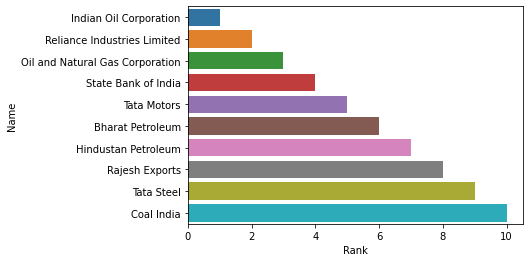

In [40]:
# Top 10 companys
top_10 = data.head(10)
sns.barplot(data=top_10,x = "Rank",y = "Name")
plt.show()

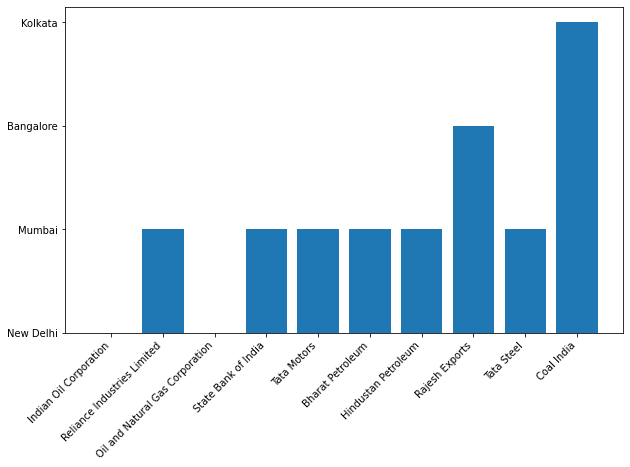

In [41]:
# top 10 company headquarters 
plt.figure(figsize=(10,6))
top_10 = data.head(10)
plt.bar(top_10["Name"],top_10["Headquarters"])
plt.xticks(rotation=45, ha="right")
plt.show()

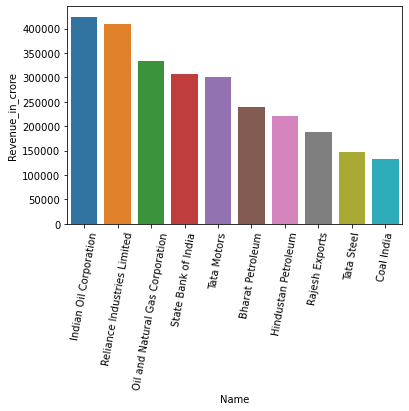

In [42]:
#top 10 revenue by company 
top_10 = data.head(10)
sns.barplot(data=top_10,x="Name",y="Revenue_in_crore")
plt.xticks(rotation=80)
plt.show()


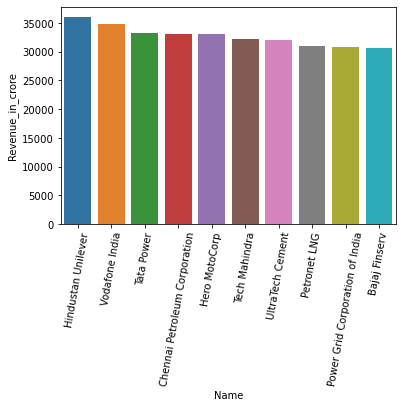

In [43]:
#bottom_10 revenue by company 
bottom_10 = data.tail(10)
sns.barplot(data=bottom_10,x="Name",y="Revenue_in_crore")
plt.xticks(rotation=80)
plt.show()


In [44]:
data["Industry"].unique()

array(['Oil and gas', 'Banking', 'Automotive', 'Gems and jewellery',
       'Iron and steel', 'Metals and mining', 'Infotech', 'Capital goods',
       'Utilities', 'Telecommunication', 'Financials', 'Diversified',
       'Consumer goods', 'Insurance', 'Cement'], dtype=object)

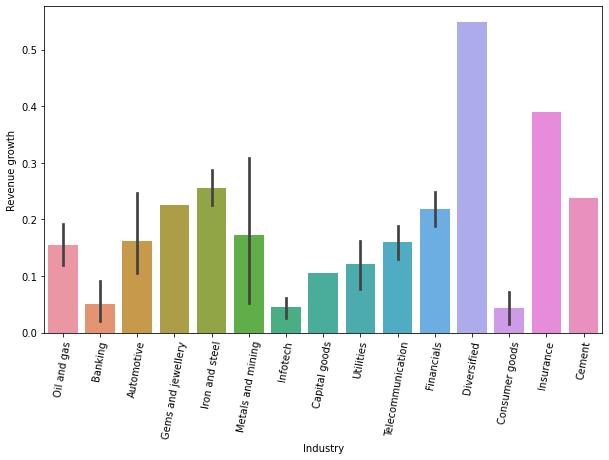

In [45]:
# Revenue growth by Industry
plt.figure(figsize=(10,6))
sns.barplot(data=data,x="Industry",y="Revenue growth")
plt.xticks(rotation=80)
plt.show()


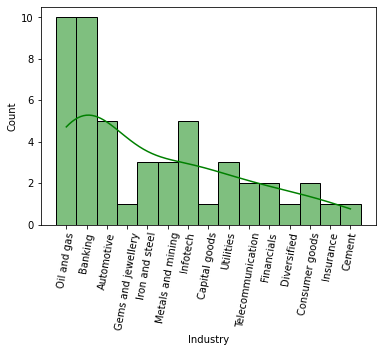

In [46]:
# total Industry
sns.histplot(data=data,x='Industry',bins=20,kde=True,color='green')
plt.xticks(rotation = 80)
plt.show()

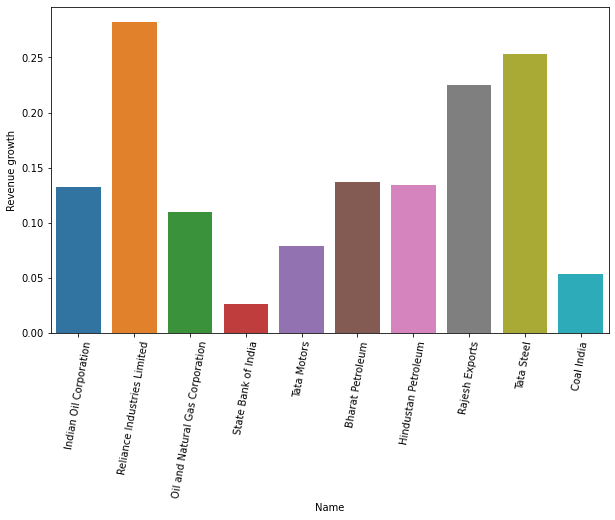

In [47]:
# top 10 revenue growth by name 
top_10 = data.head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_10,x="Name",y="Revenue growth")
plt.xticks(rotation=80)
plt.show()
